# Regularization

In [1]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
np.random.seed(123)

### Sample data

In [2]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

## OLS Regression

## One feature

In [3]:
X = housing['data'][:,:1]
X = sm.add_constant(X)
y = housing['target']
res = sm.OLS(y, X).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                 1.856e+04
Date:                Wed, 20 Mar 2024   Prob (F-statistic):               0.00
Time:                        19:03:24   Log-Likelihood:                -25623.
No. Observations:               20640   AIC:                         5.125e+04
Df Residuals:                   20638   BIC:                         5.127e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4509      0.013     34.082      0.0

## Plot x1 against predicted values to see the variation

In [ ]:
x1 = housing['data'][:,0]

In [ ]:
y_hat = res.fittedvalues

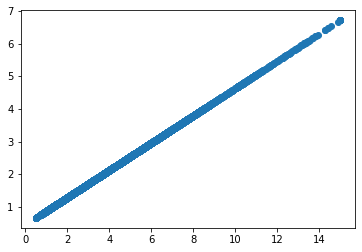

In [ ]:
plt.scatter(x1, y_hat)

Straight line - no variation because there's just one dimension!

Let's add some variation by including more features:

In [ ]:
X = housing['data'][:,:2]
X = sm.add_constant(X)
y = housing['target']
res = sm.OLS(y, X).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                 1.070e+04
Date:                Tue, 11 Oct 2022   Prob (F-statistic):               0.00
Time:                        14:58:24   Log-Likelihood:                -24899.
No. Observations:               20640   AIC:                         4.980e+04
Df Residuals:                   20637   BIC:                         4.983e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1019      0.019     -5.320      0.0

R-Squared has increased. Now look at the variation of x1

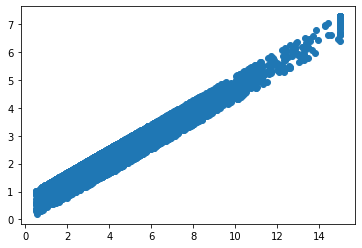

In [ ]:
plt.scatter(x1, res.fittedvalues)

This variation has increased, because for each value of X there can be different ages for the houses that might also contribute to the house price.

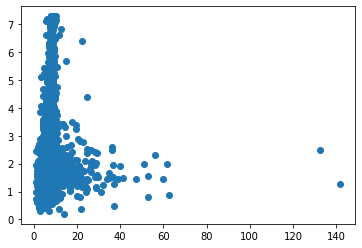

In [ ]:
x2 = housing['data'][:,2]
plt.scatter(x2, res.fittedvalues)

In [ ]:
X = housing['data'][:,:6]
X = sm.add_constant(X)
y = housing['target']
res = sm.OLS(y, X).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     4032.
Date:                Tue, 11 Oct 2022   Prob (F-statistic):               0.00
Time:                        15:00:11   Log-Likelihood:                -24235.
No. Observations:               20640   AIC:                         4.848e+04
Df Residuals:                   20633   BIC:                         4.854e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4391      0.028    -15.918      0.0

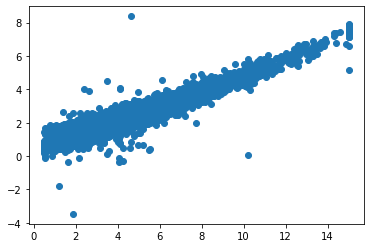

In [ ]:
plt.scatter(x1, res.fittedvalues)

There's even more variation. We have added more bias to our model. It's likely that it won't perform well on the test set.

How can we add variables without risking overfitting?

Regularization!

Do the same with Ridge Regression...

## Ridge Regression

Implementation in Statsmodels: 

`statsmodels.regression.linear_model.OLS.fit_regularized`:

`L1_wt`: The fraction of the penalty given to the L1 penalty term. Must be between 0 and 1 (inclusive). If 0, the fit is a ridge fit, if 1 it is a lasso fit.

In [ ]:
X = housing['data'][:,:6]
X = sm.add_constant(X)
y = housing['target']
res = sm.OLS(y, X).fit_regularized(alpha = 1, L1_wt = 0)

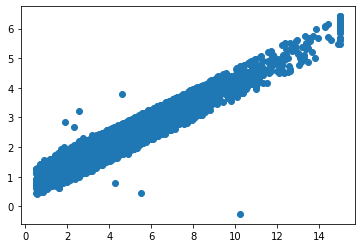

In [ ]:
plt.scatter(x1, res.fittedvalues)

In [ ]:
res.params

array([ 1.26972885e-02,  3.47393975e-01,  1.99483465e-02,  9.45188602e-03,
        7.77234124e-03,  5.62291332e-05, -4.16391069e-03])

We can see that we have removed the outlier points on the bottom, making our model probably a bit more robust when new data comes in.

### Regularization too high

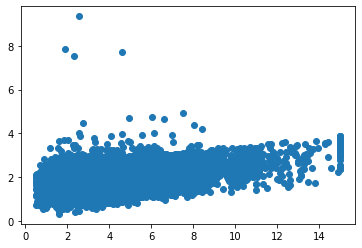

In [ ]:
X = housing['data'][:,:6]
X = sm.add_constant(X)
y = housing['target']
res = sm.OLS(y, X).fit_regularized(alpha = 20, L1_wt = 0)
plt.scatter(x1, res.fittedvalues)

In [ ]:
res.params

array([ 0.00602548,  0.08500877,  0.03609578,  0.0448902 ,  0.00453917,
        0.00023517, -0.00153011])

### Lasso regression

In [ ]:
X = housing['data'][:,:6]
X = sm.add_constant(X)
y = housing['target']
res = sm.OLS(y, X).fit_regularized(alpha = 1, L1_wt = 1)

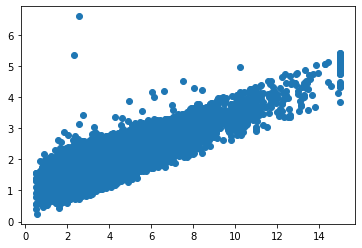

In [ ]:
plt.scatter(x1, res.fittedvalues)

The result looks similar to Ridge regression, but take a look at the parameters (first one is intercept):

In [ ]:
res.params

array([0.00000000e+00, 2.52657797e-01, 2.73587645e-02, 0.00000000e+00,
       0.00000000e+00, 1.56101485e-04, 0.00000000e+00])

### Try other values for alpha

In [ ]:
X = housing['data'][:,:6]
X = sm.add_constant(X)
y = housing['target']
res = sm.OLS(y, X).fit_regularized(alpha = 10, L1_wt = 1)

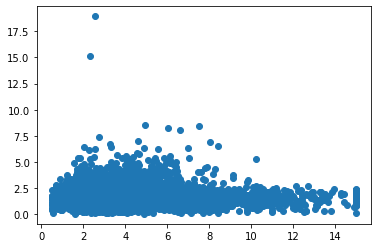

In [ ]:
plt.scatter(x1, res.fittedvalues)

### Elastic net Regression

In [ ]:
X = housing['data'][:,:3]
X = sm.add_constant(X)
y = housing['target']
res = sm.OLS(y, X).fit_regularized(alpha = 1, L1_wt = 0.5)

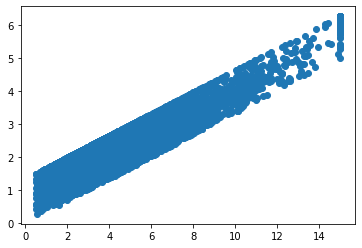

In [ ]:
plt.scatter(x1, res.fittedvalues)

We still allow variation, but capture the overall trend.

In [ ]:
res.params

array([0.        , 0.25048436, 0.03340317, 0.        ])

How do we know which one is best? For regularization it's hard to optimize with an R-Squared score (because we're decreasing the model fit on purpose). Best practice is to validate with new data using Cross-Validation - which we will cover later.